In [52]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import ticker as mticker

import matplotlib.pyplot as plt, pandas as pd, numpy as np     # all necessary

# Only need trackpy for tracking
import trackpy as tp

from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats

import os
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = False
mpl.rcParams['axes.titlesize'] = 20  # Title font size
mpl.rcParams['axes.labelsize'] = 16  # Axis label font size
mpl.rcParams['xtick.labelsize'] = 14  # X-axis tick label font size
mpl.rcParams['ytick.labelsize'] = 14  # Y-axis tick label font size
plt.rc('legend',fontsize=14,title_fontsize=14)

plt.style.use('seaborn-v0_8-white')
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.major.size'] = 5
plt.rcParams["font.family"] = 'Arial'
mpl.rcParams["text.usetex"] = False
mpl.rcParams["mathtext.default"] = 'default'

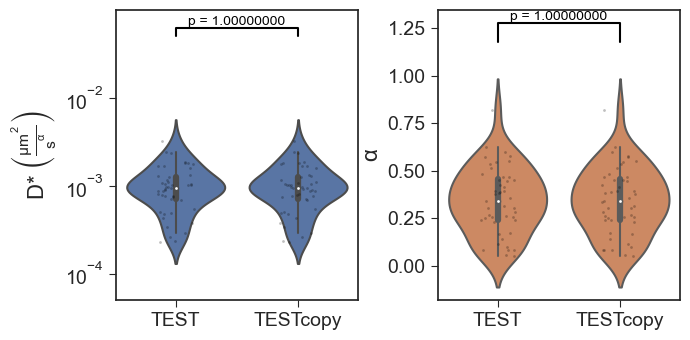

In [59]:
cond1, cond2 = 'TEST','TESTcopy'   # conditions to compare (assumes files are 'CONDITION_params.csv')
cond_list = [cond1,cond2]
dirn = "compare\\"        # input directory 

data_all = pd.DataFrame()
imsds = pd.DataFrame()

# Load data
for fn in cond_list:
    df = pd.read_csv(dirn+fn+'_params.csv', index_col = 0)
    df['Condition'] = fn
    data_all = pd.concat([data_all,df])


# Filter out bad fits:
data_all = data_all[data_all.alpha < 1.95]
data_all = data_all[data_all.alpha > 0.05]
data_all['sigma'] = data_all.sigma*1000

# Plot violin plots:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(7, 3.5), sharey=False, sharex=True)
order = data_all.groupby(['Condition'])['sigma'].mean().index.values

sns.stripplot(data=data_all, x ='Condition', y = 'alpha', ax=axs[1], jitter = 0.15, color = 'black',alpha = 0.25,size = 2, order = order)
sns.violinplot(data=data_all,x = 'Condition',y='alpha', ax=axs[1],color = sns.color_palette("deep")[1],scale = 'width', order = order)


axs[1].set_ylabel(r'$\alpha$')
axs[1].set_xlabel('')

# Calculate p-value for alpha:
mwu = stats.mannwhitneyu(x=data_all[data_all['Condition']==cond1]['alpha'], 
                         y=data_all[data_all['Condition']==cond2]['alpha'],
                         alternative = 'two-sided')

p_val = mwu[1]

# add MWUT annotations
yd = axs[1].get_ylim()[1]*0.95
x1, x2 = 0, 1  
y, h, col = yd-0.01+0.2, 0.1, 'k'
axs[1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axs[1].text((x1+x2)*.5, y+h, "p = "+f"{p_val:.8f}", ha='center', va='bottom', color=col)

df = data_all
data = df['D_eff'].values
log_data = [np.log10(d) for d in data]

df['logdat'] = log_data
sns.stripplot(data=data_all,x = 'Condition',y='logdat', ax=axs[0], jitter = 0.15, color = 'black',alpha = 0.25, size = 2,order=order)
sns.violinplot(data=data_all,x = 'Condition',y='logdat', ax=axs[0],color = sns.color_palette("deep")[0],scale = 'width', order = order)

axs[0].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))

# Calculate p-value for D*:
mwu = stats.mannwhitneyu(x=data_all[data_all['Condition']==cond1]['D_eff'], 
                         y=data_all[data_all['Condition']==cond2]['D_eff'],
                         alternative = 'two-sided')

p_val = mwu[1]
axs[0].set_ylim([-4.3, -1.05])   # can change this if needed
ymin, ymax = axs[0].get_ylim()
tick_range = np.arange(np.floor(ymin), ymax)[1:]
axs[0].yaxis.set_ticks(tick_range)
axs[0].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

yheight = axs[0].get_ylim()[1]*1.15
axs[0].set_ylabel(r'D* $\left(\frac{\mu m^{2}}{s^{\alpha}}\right)$')
axs[0].set_xlabel('')

# add MWUT annotations
yd = axs[0].get_ylim()[1]*1.4
x1, x2 = 0, 1  
y, h, col = yd-0.1+0.2, 0.1, 'k'
axs[0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
axs[0].text((x1+x2)*.5, y+h, "p = "+f"{p_val:.8f}", ha='center', va='bottom', color=col)

plt.tight_layout()
#plt.show()
plt.savefig(dirn+'compare.svg')